# Preprocessing

## GPU information

In [ ]:
 !nvidia-smi

Mon May  8 12:47:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import tensorflow as tf
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image and corresponding label

[[[106 118 120]
  [ 95 107 109]
  [ 98 109 113]
  ...
  [ 92 104 108]
  [ 91 102 106]
  [ 94 105 109]]

 [[102 114 116]
  [103 115 117]
  [ 98 109 113]
  ...
  [110 122 126]
  [ 99 110 114]
  [ 93 105 107]]

 [[ 98 110 112]
  [108 120 122]
  [109 121 123]
  ...
  [ 88 103 106]
  [ 85  98 100]
  [ 86 100  99]]

 ...

 [[ 93 105 109]
  [ 78  90  94]
  [ 68  80  84]
  ...
  [101 113 115]
  [ 98 109 113]
  [102 114 118]]

 [[ 77  92  95]
  [ 88 100 104]
  [ 90 102 104]
  ...
  [114 123 127]
  [109 118 122]
  [ 99 110 114]]

 [[ 71  86  89]
  [ 94 106 110]
  [ 96 108 110]
  ...
  [113 122 126]
  [106 115 119]
  [101 110 114]]]


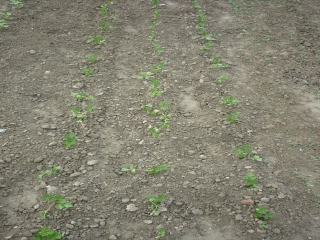

(240, 320, 3)


In [ ]:
img = cv2.imread('/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/imgs/crop_row_001.jpg')
print(img)
cv2_imshow(img)
print(img.shape)

(240, 320)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


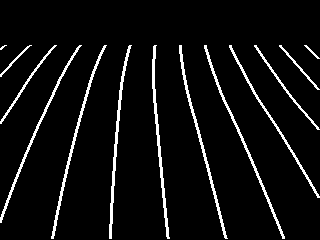

In [ ]:
data = np.load('/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/masks/crop_row_010.npy')
mask=data[:,:,0]
print(mask.shape)
print(mask)
cv2_imshow(mask)

## Creating a image - label dataframe

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df = pd.DataFrame(columns = ['label_name', 'image','mask'])
for i in range(281):
    if i < 9:
        imgname  = 'crop_row_' + '00' + str(i+1) + '.jpg'
        filename = 'crop_row_' + '00' + str(i+1) + '.npy'
    elif i < 99:
        imgname  = 'crop_row_' + '0' + str(i+1) + '.jpg'
        filename = 'crop_row_' + '0' + str(i+1) + '.npy'
    else:
        imgname  = 'crop_row_' + str(i+1) + '.jpg'
        filename = 'crop_row_' + str(i+1) + '.npy'
    try:
        img = cv2.imread('/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/imgs/' + imgname)
        data = data = np.load('/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/masks/' + filename)
        mask=data[:,:,0]
        mask = np.reshape(mask,(mask.shape[0],mask.shape[1],1))
        df= df.append({'label_name': imgname, 'image': img, 'mask': mask}, ignore_index=True)
    except:
        continue


<class 'numpy.ndarray'>
(240, 320, 1)
(240, 320, 3)


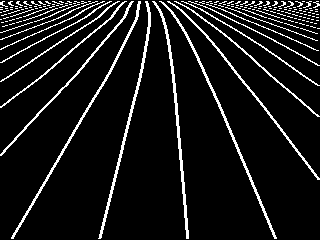

In [ ]:
data = data = np.load('/content/drive/MyDrive/detecting-crop-rows-from-image-data/train_labels/train_labels/' + filename)

img = cv2.imread('/content/drive/MyDrive/detecting-crop-rows-from-image-data/Images/Images/' + imgname)
mask=data[:,:,0]
print(type(mask))
mask = np.reshape(mask,(mask.shape[0],mask.shape[1],1))
print(mask.shape)
print(img.shape)
cv2_imshow(mask)

In [ ]:
df.head(10)

,label_name,image,mask
0,crop_row_001.jpg,"[[[106, 118, 120], [95, 107, 109], [98, 109, 1...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
1,crop_row_002.jpg,"[[[90, 104, 100], [128, 142, 138], [133, 147, ...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
2,crop_row_003.jpg,"[[[114, 145, 130], [112, 143, 128], [120, 148,...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
3,crop_row_004.jpg,"[[[109, 131, 129], [103, 130, 126], [99, 132, ...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
4,crop_row_005.jpg,"[[[79, 133, 98], [77, 131, 96], [81, 131, 97],...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
5,crop_row_006.jpg,"[[[90, 143, 110], [93, 146, 113], [88, 137, 10...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
6,crop_row_008.jpg,"[[[45, 95, 77], [41, 94, 74], [40, 96, 75], [4...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
7,crop_row_009.jpg,"[[[40, 64, 70], [38, 62, 68], [32, 51, 59], [4...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
8,crop_row_010.jpg,"[[[53, 86, 82], [58, 91, 87], [60, 88, 89], [3...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."
9,crop_row_011.jpg,"[[[48, 78, 79], [52, 86, 85], [32, 73, 65], [4...","[[[0], [0], [0], [0], [0], [0], [0], [0], [0],..."


In [ ]:
df.iloc[1]['image'].shape

(240, 320, 3)

##visualizing few training data images


(240, 320, 1)


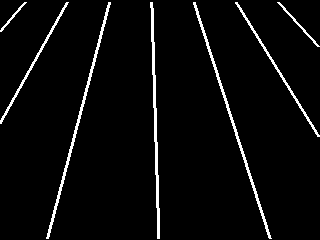


(240, 320, 1)


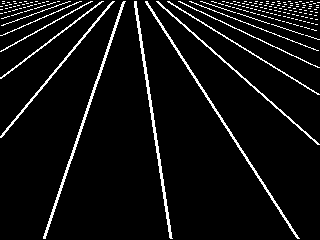


(240, 320, 1)


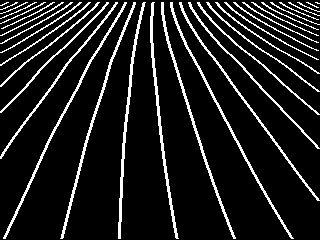


(240, 320, 1)


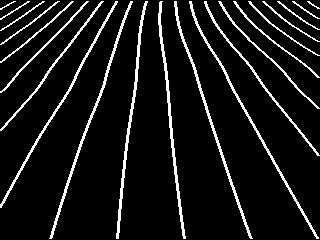


(240, 320, 1)


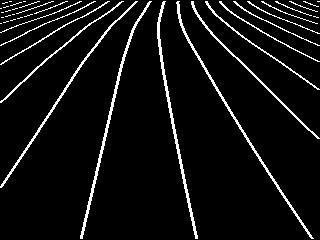


(240, 320, 1)


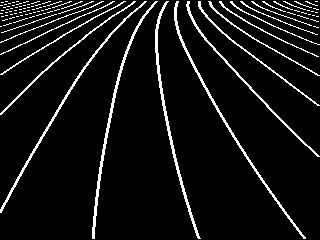


(240, 320, 1)


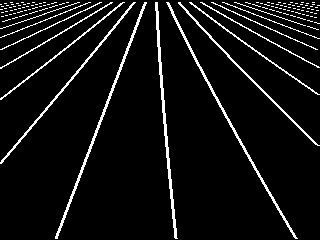


(240, 320, 1)


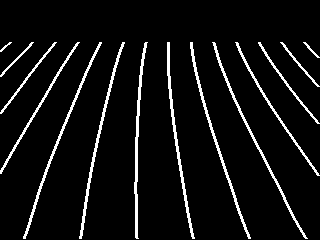


(240, 320, 1)


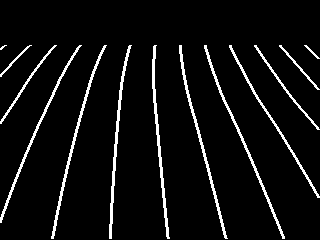


(240, 320, 1)


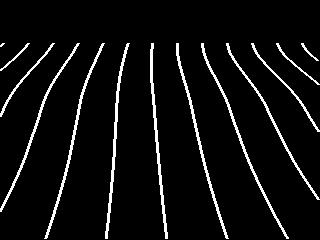

In [ ]:

for i in range(10):
  img = df.iloc[i]['mask']
  print(mask.shape)
  cv2_imshow(img)
  print()

# Defining UNET model and its utility functions

## UNet model

In [ ]:
import torch
import torch.nn as nn

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )


class UNet(nn.Module):

    def __init__(self, n_class,threshold = 0.5):
        super().__init__()

        self.dconv_down1 = double_conv(3, 64)
        self.dconv_down2 = double_conv(64, 128)
        self.dconv_down3 = double_conv(128, 256)
        self.dconv_down4 = double_conv(256, 512)

        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.dconv_up3 = double_conv(256 + 512, 256)
        self.dconv_up2 = double_conv(128 + 256, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)



        # greyscale image
        self.conv_last = nn.Sequential(
        		            nn.Conv2d(64, 1, 1),
            nn.Sigmoid()
        )


    def forward(self, x):
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)

        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)

        x = self.dconv_down4(x)

        x = self.upsample(x)
        x = torch.cat([x, conv3], dim=1)

        x = self.dconv_up3(x)
        x = self.upsample(x)
        x = torch.cat([x, conv2], dim=1)

        x = self.dconv_up2(x)
        x = self.upsample(x)
        x = torch.cat([x, conv1], dim=1)

        x = self.dconv_up1(x)

        out = self.conv_last(x)


        return out

## loss function

In [ ]:
def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()

    intersection = (pred * target).sum(dim=2).sum(dim=2)

    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))

    return loss.mean()

# Model training

## Preparing data for model training

In [ ]:
x_train = df['image']
y_train = df['mask']
#x_train = x_train.to_numpy()
#y_train = y_train.to_numpy()
#dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()


In [ ]:
len(x_train)

210

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
    def __init__(self, x_train,y_train, transform=None):
        self.input_images, self.target_masks = x_train, y_train
        self.transform = transform

    def __len__(self):
        return len(self.input_images)

    def __getitem__(self, idx):
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        if self.transform:
            image = self.transform(image)
            image = image.float()
            mask = self.transform(mask)
            mask = mask.float()

        return [image, mask]

# use same transform for train/val for this example
trans = transforms.Compose([
    transforms.ToTensor(),
])

train_set = SimDataset(x_train,y_train,trans)
#val_set = SimDataset(200, transform = trans)

#image_datasets = {
#   'train': train_set, 'val': val_set
#}

image_datasets = {
    'train': train_set
}

batch_size = 25

#dataloaders = {
#    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
#    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
#}

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
    }

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

{'train': 210}

torch.Size([25, 3, 240, 320]) torch.Size([25, 1, 240, 320])
(3, 240, 320)
0.0 1.0 0.49576962 0.09893368
(1, 240, 320)
0.0 255.0 18.378725 65.945404


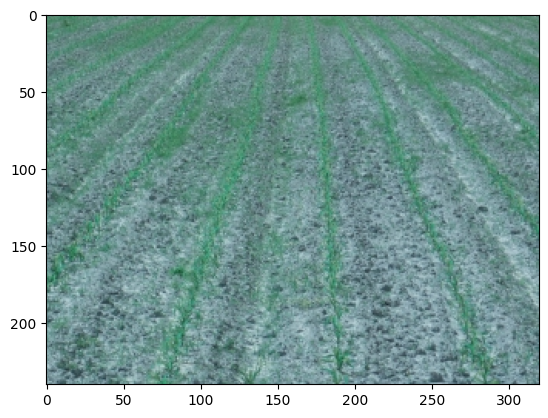

In [ ]:
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)

    return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x[0].shape)
    print(x.min(), x.max(), x.mean(), x.std())

plt.imshow(reverse_transform(inputs[3]))

## Functions for model training

In [ ]:
## priting the model summary

from torchsummary import summary
import torch
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(1)
model = model.to(device)

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
from collections import defaultdict
import torch.nn.functional as F
import time

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        since = time.time()

        # Each epoch has a training and validation phase
        #for phase in ['train', 'val']:
        for phase in ['train']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])

                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#evice = torch.device("cpu")
print(device)

num_class = 1

model = UNet(num_class).to(device)

# Observe that all parameters are being optimized
optimizer_ft = optim.RMSprop(model.parameters(), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=31)

cuda:0
Epoch 0/30
----------
LR 0.0001
train: bce: -13.683510, dice: -0.345904, loss: -7.014707
0m 10s
Epoch 1/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 2/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 3/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 4/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 5/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 6/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 7/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 8/30
----------
LR 0.0001
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 9/30
----------
LR 1e-05
train: bce: -15.648221, dice: -0.396523, loss: -8.022372
0m 11s
Epoch 10/30
----------
LR 1e-05
tr

# Predictions

## loading test ids to a dataframe

In [ ]:
test_label = pd.read_csv("/content/drive/MyDrive/detecting-crop-rows-from-image-data/train and test ids.csv")
test_label.head()

,train_ids,test_ids
0,255,162.0
1,29,19.0
2,130,75.0
3,226,244.0
4,54,101.0


In [ ]:
len(test_label['test_ids'])
test_ids = []
for x in range(71):
  test_ids.append(str(int(test_label.iloc[x]['test_ids'])))


## Predicting results

In [ ]:
from math import e

def load_image(image_path, input_size=(240, 320)):
    image = Image.open(image_path)
    #image = image.resize(input_size, Image.ANTIALIAS)
    image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).float().unsqueeze(0)
    return image_tensor

def predict(model, input_tensor, device):
    model.eval()
    with torch.no_grad():
        input_tensor = input_tensor.to(device)
        output_tensor = model(input_tensor)
    return output_tensor

final_outputs = {}
# Load an input image for prediction
for x in test_ids:

    if len(x) == 1:
      input_image_path = '/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/test/crop_row_' + '00' + x + '.jpg'
      input_image = '00' + x
    elif len(x) == 2:
       input_image_path = '/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/test/crop_row_' + '0' + x + '.jpg'
       input_image = '0' + x
    else:
       input_image_path = '/content/drive/MyDrive/detecting-crop-rows-from-image-data/Data/test/crop_row_' + x + '.jpg'
       input_image =  x

    input_tensor = load_image(input_image_path)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    output_tensor = predict(model, input_tensor, device)

    output_tensor_np = output_tensor.squeeze().cpu().numpy()

    for x in range(240):
      for y in range(320):
        if output_tensor_np[x][y] > 0.425:
          output_tensor_np[x][y] = 0
        else:
          output_tensor_np[x][y] = 255

    final_outputs[input_image] = output_tensor_np





## Displaying predicted output

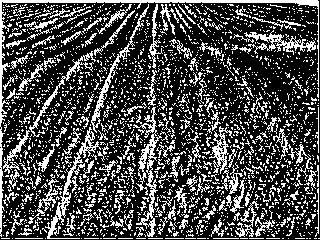

In [ ]:
cv2_imshow(final_outputs['007'])

## Encoding predicted labels using encode_mask_to_rle function

In [ ]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask
    255 - mask
    0 - background
    Returns encoded run length
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)

In [ ]:
final_output = pd.DataFrame(columns = ['ids', 'labels'])
for key, value in final_outputs.items():
  label = encode_mask_to_rle(value)
  final_output = final_output.append({'ids': key, 'labels': label}, ignore_index=True)

In [ ]:
final_output.head()

,ids,labels
0,162,1 319 321 319 641 319 961 13 975 6 982 1 986 2...
1,019,1 281 283 26 312 6 321 319 642 1 644 234 879 4...
2,075,1 319 321 319 641 7 649 3 653 6 660 9 671 2 67...
3,244,1 319 321 319 641 2 644 7 654 1 657 12 673 9 6...
4,101,1 318 321 319 641 8 650 14 665 9 675 22 698 1 ...


In [ ]:
final_output.to_csv('Final_submission_Vedant Barbhaya.csv', index=False)